# Analysis to see if there is any relationship between the spread of the the Covid 19 virus in a country and how happy people are, living in that country. 

### Task 1 Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from the path on desktop. 


In [2]:
df=pd.read_csv(r'C:\Users\PurvaRaut\Desktop\DataAnalytics\PortfolioProjects\1.Covid19_Data_Analysis_Using_Python\covid19_Confirmed_dataset.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [4]:
#shape gives number of rows and columns
df.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [8]:
df.drop(["Lat","Long"],axis=1,inplace=True)
#we do not need 'Lat' and 'Long' columns. se we dropped a list of those columns and axis=1 is for columns.
#inplace=True drops the columns from the original dataframe

In [10]:
df.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Task 2.3: Aggregating the rows by the country

In [11]:
#we want data grouped by countries and do not need data of each province/state of country.
#Lets aggregate the data using group by method.
df_aggregated=df.groupby("Country/Region").sum()

In [12]:
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [14]:
df_aggregated.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

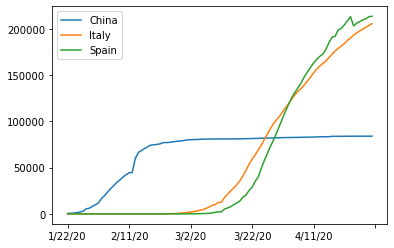

In [22]:
df_aggregated.loc["China"].plot()
df_aggregated.loc["Italy"].plot()
df_aggregated.loc["Spain"].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<AxesSubplot:>

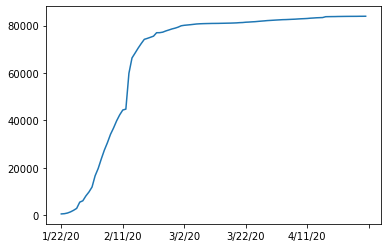

In [20]:
df_aggregated.loc['China'].plot()

<AxesSubplot:>

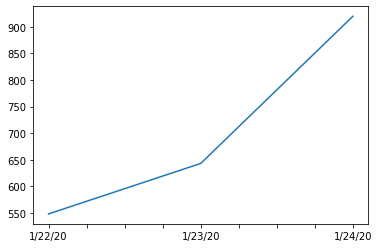

In [21]:
df_aggregated.loc['China'][:3].plot()
#for 1st 3 days

### task 3.1: caculating the first derivative of the curve

<AxesSubplot:>

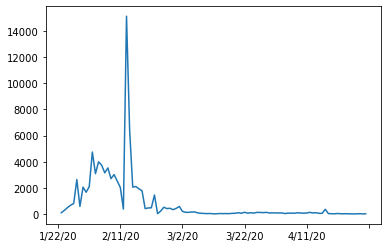

In [23]:
df_aggregated.loc['China'].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [25]:
df_aggregated.loc['China'].diff().max()

15136.0

In [26]:
df_aggregated.loc['Italy'].diff().max()

6557.0

In [27]:
df_aggregated.loc['Spain'].diff().max()

9630.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [32]:
#creating list of all the countries
countries=list(df_aggregated.index)

In [38]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [35]:
#calculating the max infection rate for all the countries and storing it in a list.
max_infection_rate=[]
for c in countries:
    max_infection_rate.append(df_aggregated.loc[c].diff().max())    

In [40]:
max_infection_rate

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [41]:
#add the list for max_infection rate to the dataframe
df_aggregated["max_infection_rate"]=max_infection_rate

In [42]:
df_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


### Task 3.4: create a new dataframe with only needed column 

In [47]:
df_covid= pd.DataFrame(df_aggregated["max_infection_rate"])

In [48]:
df_covid

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [49]:
df_happiness=pd.read_csv(r'C:\Users\PurvaRaut\Desktop\DataAnalytics\PortfolioProjects\1.Covid19_Data_Analysis_Using_Python\worldwide_happiness_report.csv')

In [50]:
df_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [51]:
df_happiness.shape

(156, 9)

### Task 4.2: let's drop the useless columns 

In [52]:
df_happiness.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis=1,inplace=True)

In [53]:
df_happiness

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


### Task 4.3: changing the indices of the dataframe

In [54]:
df_happiness.set_index("Country or region", inplace=True)

In [55]:
df_happiness

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [56]:
df_covid.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [58]:
df_covid.shape

(187, 1)

#### wolrd happiness report Dataset :

In [59]:
df_happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [61]:
df_happiness.shape

(156, 4)

In [62]:
data= df_covid.join(df_happiness, how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [63]:
data.shape

(143, 5)

### Task 4.5: correlation matrix 

In [64]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [65]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

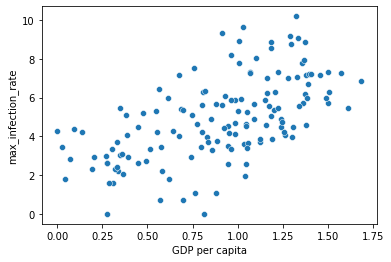

In [67]:
x= data["GDP per capita"]
y= data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

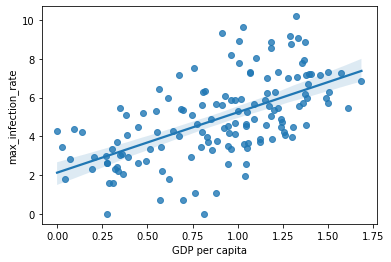

In [69]:
sns.regplot(x,np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

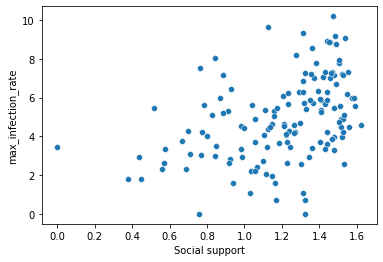

In [71]:
x1= data["Social support"]
y1= data["max_infection_rate"]
sns.scatterplot(x1,np.log(y1))

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

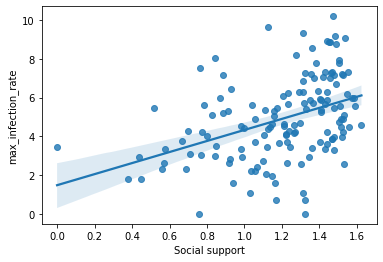

In [72]:
sns.regplot(x1,np.log(y1))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

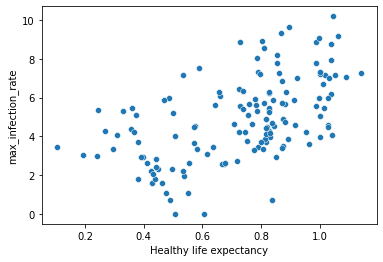

In [73]:
x2= data["Healthy life expectancy"]
y2= data["max_infection_rate"]
sns.scatterplot(x2,np.log(y2))

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

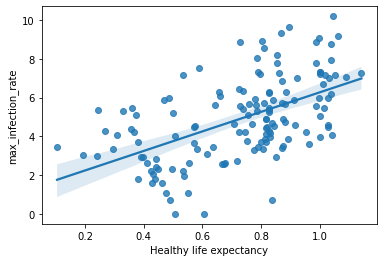

In [74]:
sns.regplot(x2,np.log(y2))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

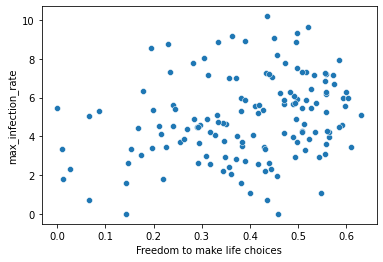

In [75]:
x3= data["Freedom to make life choices"]
y3= data["max_infection_rate"]
sns.scatterplot(x3,np.log(y3))

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

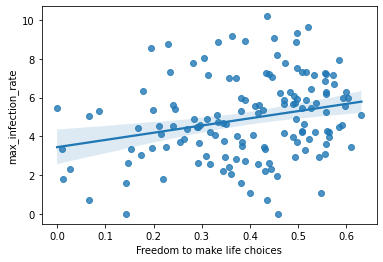

In [76]:
sns.regplot(x3,np.log(y3))

In [ ]:
#Insight-People who live in developed countries are more prone to get the infection with comparison to the less developed countries.
#But,this might be due to lack of corona test kits in the less developed countries.
#Lets do the same analysis usng the covid deaths datasets and world happiness dataset.

In [ ]:
#Import corona deaths dataset

In [77]:
df_deaths=pd.read_csv(r'C:\Users\PurvaRaut\Desktop\DataAnalytics\PortfolioProjects\1.Covid19_Data_Analysis_Using_Python\covid19_deaths_dataset.csv')

In [78]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#group by countries

In [80]:
df_deaths_agg=df_deaths.groupby("Country/Region").sum()

In [81]:
df_deaths_agg

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,4,4,4,4,2,2,2,2,2,2
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [82]:
#Drop useless columns
df_deaths_agg.drop(["Lat","Long"],axis=1,inplace=True)

In [83]:
df_deaths_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,2,2,2,2,2,2
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [93]:
df_deaths_agg.loc["Albania"].diff().max()

4.0

In [85]:
countries2=list(df_deaths_agg.index)

In [86]:
countries2

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [88]:
maximum_death_rate=[]
for i in countries2:
    maximum_death_rate.append(df_deaths_agg.loc[i].diff().max())    

In [89]:
maximum_death_rate

[7.0,
 4.0,
 30.0,
 4.0,
 2.0,
 1.0,
 13.0,
 3.0,
 8.0,
 30.0,
 3.0,
 3.0,
 1.0,
 15.0,
 1.0,
 5.0,
 496.0,
 1.0,
 1.0,
 0.0,
 6.0,
 6.0,
 1.0,
 493.0,
 1.0,
 6.0,
 4.0,
 2.0,
 1.0,
 1.0,
 0.0,
 20.0,
 251.0,
 0.0,
 3.0,
 13.0,
 1290.0,
 26.0,
 0.0,
 3.0,
 5.0,
 1.0,
 4.0,
 8.0,
 6.0,
 2.0,
 18.0,
 22.0,
 2.0,
 1.0,
 0.0,
 38.0,
 208.0,
 22.0,
 1.0,
 1.0,
 0.0,
 6.0,
 1.0,
 2.0,
 0.0,
 43.0,
 1440.0,
 1.0,
 1.0,
 1.0,
 510.0,
 5.0,
 10.0,
 0.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 0.0,
 8.0,
 23.0,
 5.0,
 75.0,
 60.0,
 158.0,
 7.0,
 220.0,
 13.0,
 919.0,
 2.0,
 47.0,
 2.0,
 5.0,
 2.0,
 11.0,
 10.0,
 4.0,
 3.0,
 0.0,
 4.0,
 2.0,
 4.0,
 1.0,
 1.0,
 6.0,
 8.0,
 2.0,
 0.0,
 1.0,
 8.0,
 1.0,
 4.0,
 1.0,
 1.0,
 2.0,
 163.0,
 10.0,
 2.0,
 0.0,
 1.0,
 12.0,
 0.0,
 0.0,
 0.0,
 234.0,
 4.0,
 1.0,
 4.0,
 7.0,
 6.0,
 16.0,
 2.0,
 42.0,
 11.0,
 0.0,
 2.0,
 108.0,
 50.0,
 40.0,
 37.0,
 2.0,
 34.0,
 105.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 9.0,
 2.0,
 54.0,
 0.0,
 3.0,
 2.0,
 4.0,
 6.0,
 8.0,
 14.0,
 0.

In [94]:
df_deaths_agg["maximum_death_rate"]=maximum_death_rate

In [95]:
df_deaths_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,maximum_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [97]:
df_covid_deaths=pd.DataFrame(df_deaths_agg["maximum_death_rate"])

In [98]:
df_covid_deaths

,maximum_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0
...,...
West Bank and Gaza,1.0
Western Sahara,0.0
Yemen,2.0


In [99]:
df_covid_deaths.shape

(187, 1)

In [ ]:
#Joining df_covid_deaths and df_happiness

In [100]:
data2= df_covid_deaths.join(df_happiness, how="inner")
data2.head()

,maximum_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


In [102]:
data2.corr()
#we see positive correlatuon between maximim death rates and GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices

,maximum_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
maximum_death_rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


In [ ]:
#Plotting 

C:\Users\PurvaRaut\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='maximum_death_rate'>

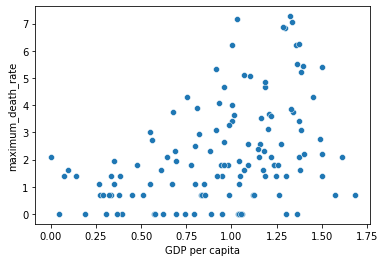

In [108]:
x4= data2["GDP per capita"]
y4= data2["maximum_death_rate"]
sns.scatterplot(x4,np.log(y4))

C:\Users\PurvaRaut\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='maximum_death_rate'>

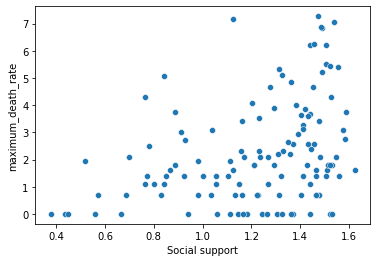

In [109]:
x5= data2["Social support"]
y5= data2["maximum_death_rate"]
sns.scatterplot(x5,np.log(y5))

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='maximum_death_rate'>

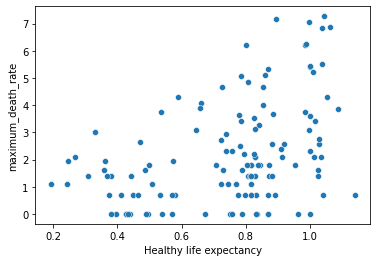

In [115]:
x6= data2["Healthy life expectancy"]
y6= data2["maximum_death_rate"]
sns.scatterplot(x6,np.log(y6))

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='maximum_death_rate'>

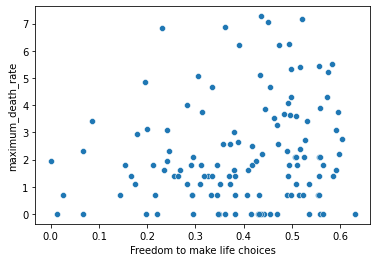

In [117]:
x7= data2["Freedom to make life choices"]
y7= data2["maximum_death_rate"]
sns.scatterplot(x7,np.log(y7))

In [118]:
#We did the same analysis using the covid deaths and found out that covid deaths are more in the developed countries.